In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pwtools.signal import pad_zeros, welch, mirror, acorr
# from scipy.signal import correlate
# from scipy.fftpack import fft,ifft
# infile_aho = open("tcf_QMAHO.out", "r")
# #infile = open("tcf_QMHO.out", "r")
# infile = open("tcf_QMHO_hmc.out", "r")

# #mom_infile = open("p_HO.out","r")
# %matplotlib notebook

# Kpp = []
# t_list = []
# for line in infile:
#     tok=line.split()
#     #print(tok)
#     t_list.append(float(tok[0]))
#     Kpp.append(float(tok[1]))
    
# Kpp_aho = []
# t_list_aho = []
# for line in infile_aho:
#     tok=line.split()
#     #print(tok)
#     t_list_aho.append(float(tok[0]))
#     Kpp_aho.append(float(tok[1]))
    
# Kpp=Kpp[:-1]
# n=len(Kpp)    
# dt=t_list[1]-t_list[0]
# f=np.fft.fftfreq(2*n-1, dt)[:n]
# #p1=(abs(fft(pad(p)))**2.0)[:n]
# p2=(abs(fft(mirror(Kpp))))[:n]
# #plt.plot(f,p2)
# #print(np.fft.fft(Kpp))
# ft_K_pp = np.fft.rfft(Kpp)
# freqs = np.fft.rfftfreq(len(Kpp), 20.0) # Get frequency axis from the time axis
# mags = abs(ft_K_pp) # We don't care about the phase information here
# plt.plot(freqs,mags)
# # plt.xlim(0,10)
# #plt.plot(abs(ft_K_pp))

# #plt.plot(freqs,np.fft.fft(Kpp))
# ft_K_pp_aho = np.fft.rfft(Kpp_aho)
# freqs_aho = np.fft.rfftfreq(len(Kpp_aho), 20.0) # Get frequency axis from the time axis
# mags_aho = abs(ft_K_pp_aho) # We don't care about the phase information here
# plt.plot(freqs_aho,mags_aho,label='aho')
# p3=(abs(fft(mirror(Kpp_aho))))[:n]
# #plt.plot(f,p3,label="aho")
# # plt.xlim(0,10)
# plt.legend()
# plt.show()

In [12]:
# from pwtools.signal import pad_zeros, welch, mirror, acorr
# from scipy.signal import correlate
# from scipy.fftpack import fft,ifft
# from numpy import linspace,random
# import matplotlib.pyplot as plt
# %matplotlib notebook

# pad=lambda x: pad_zeros(x, nadd=len(x)-1)
# n=500; w=welch(n)
# t=linspace(0,1,n); dt=t[1]-t[0]
# v=np.array([sin(2*pi*f*t + random.rand()*2*pi) for f in random.rand(10)*100]).sum(0)
# f=np.fft.fftfreq(2*n-1, dt)[:n]
# #plt.plot(t,v); plt.title('signal')

# c1=mirror(ifft(abs(fft(pad(v)))**2.0)[:n].real)
# c2=correlate(v,v,'full')
# c3=mirror(acorr(v,norm=False))
# #plt.plot(c1, label='fft'); plt.plot(c2, label='scipy'); \
# #plt.plot(c3, label='acorr'); plt.title('corr'); plt.legend()

# p1=(abs(fft(pad(v)))**2.0)[:n]
# p2=(abs(fft(mirror(acorr(v,norm=False)))))[:n]
# plt.plot(f,p2, label='acorr')
# plt.plot(f,p1, label='fft')
# plt.title('spectrum')
# plt.legend()
# plt.show()

In [13]:
# plt.plot(f,p2, label='acorr')
# plt.show()

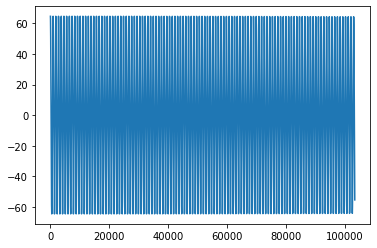

In [9]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#infile = open("aho_tcf_data.out", "r")
tcf_outfile = open("pimd_tcf.out", "r")
# tcf_outfile = open("tcf_QMAHO.out", "r")

#tcf_outfile = open("tcf_QMHO_hmc.out", "r")

# %matplotlib notebook

hbar=1.0
CM_INV_TO_AU = 7.2516e-7
BOLTZMANN_AU = 3.1668114E-06      #Hartree/K
KCAL_MOL_ANG_CUB_TO_AU = 0.00023614758

# initialize (thermalize) the system (cold first). The system is an array of N_tau position values corresponding to N_tau values of time.
T=300 # temp in kelvin
k = 1.0
kT=BOLTZMANN_AU*T
beta=1/kT
N_tau =100  # number of timeslices
d_tau = beta / N_tau
N_sep = 20 # Every N_sep sweep is used to calculate observable quantities

# Lambda = 21.0 #21kcal mol^-1 Angstrom^-3. kcal/mol -> hartree = 1/627.5094736
Lambda = 0.0 #21kcal mol^-1 Angstrom^-3. kcal/mol -> hartree = 1/627.5094736

Lambda *= KCAL_MOL_ANG_CUB_TO_AU
# Angstrom^-3 -> bohr^-3 = (1/0.52917721)^3
                
m = 1836.15 # mass of particle in a.u
omega = 1500.0 # i.e. dtau which is hbar*beta but hbar=1 in these reduced units
omega *= CM_INV_TO_AU

Omega=omega

Phi = np.tanh(beta*hbar*Omega/2.0)/(beta*hbar*(1.0*Omega)/2.0)

Kpp = []
t_list = []
for line in tcf_outfile:
    tok=line.split()
    #print(tok)
    t_list.append(float(tok[0]))
    Kpp.append(float(tok[1]))
plt.plot(t_list,Kpp)
# #ft_K_pp = np.fft.rfft(Kpp)
# #freqs = np.fft.rfftfreq(len(Kpp), 1.0) # Get frequency axis from the time axis
# #mags = abs(ft_K_pp) # We don't care about the phase information here
# #plt.plot(freqs,mags)
# plt.show()
# #plt.plot(abs(ft_K_pp))

2000
60.123539273511426
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.46910938e-06 1.58253226e-06 1.70420290e-06 ... 1.70420290e-06
  1.58253226e-06 1.46910938e-06]
 [1.49675584e-06 1.61231318e-06 1.73627348e-06 ... 1.73627348e-06
  1.61231318e-06 1.49675584e-06]
 [1.52480840e-06 1.64253153e-06 1.76881513e-06 ... 1.76881513e-06
  1.64253153e-06 1.52480840e-06]
 ...
 [1.52480840e-06 1.64253153e-06 1.76881513e-06 ... 1.76881513e-06
  1.64253153e-06 1.52480840e-06]
 [1.49675584e-06 1.61231318e-06 1.73627348e-06 ... 1.73627348e-06
  1.61231318e-06 1.49675584e-06]
 [1.46910938e-06 1.58253226e-06 1.70420290e-06 ... 1.70420290e-06
  1.58253226e-06 1.46910938e-06]]
[[1.46910938e-06 1.58253226e-06 1.70420290e-06 ... 1.70420290e-06
  1.58253226e-06 1.46910938e-06]
 [1.49675584e-06 1.61231318e-06 1.73627348e-06 ... 1.73627348e-06
  1.61231318e-06 1.49675584e-06]
 [1.52480840e-06 1.642

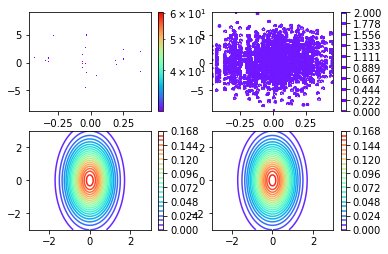

In [8]:
#outfile = open("samples_QMHO_12_05_saved.out", "r")
#outfile = open("samples_QMAHO_saved", "r")
#outfile = open("samples_QMAHO.out", "r")
#outfile = open("samples_QMHO_hmc.out", "r")
#outfile = open("samples_QMAHO_hmc.out", "r")
#outfile = open("samples_QMAHO_ipi_ivr.out", "r")
#outfile = open("samples_QMHO.out", "r")
outfile = open("pimd_wigner_samples.out", "r")

#outfile = open("samples_morse.out", "r")
import plotly.graph_objects as go

import numpy as np
from matplotlib import colors


def analytic_rho_w(hbar,omega,beta,m,q,p):
    theta=hbar*omega/(2.0*np.tanh(beta*hbar*omega/2.0))
    rho_w_0 = (omega/(2.0*np.pi*theta)) * np.exp(-(1.0/theta)*(0.5*p**2/m + 0.5*m*omega**2*q**2))
    return rho_w_0

def analytic_rho_w_aho(Lambda,hbar,omega,beta,m,q,p):
    theta=hbar*omega/(2.0*np.tanh(beta*hbar*omega/2.0))
    theta_2 = hbar*omega/np.tanh(beta*hbar*omega)
    correction = 1.0 - (Lambda*q/(m*omega**2))*(theta_2/theta - 1) - ((2.0/9.0)*Lambda*q**3/theta)*(2.5 - theta_2/theta) + (Lambda*q*(p**2)/(3.0*m**2*omega**2*theta))*( theta_2/theta - 1)
    
    rho_w_0 = (omega/(2.0*np.pi*theta)) * np.exp(-(1.0/theta)*(0.5*p**2/m + 0.5*m*omega**2*q**2))
    rho_w = rho_w_0*correction
    return rho_w

def sample_analytic_rho_w_aho(Lambda,hbar,omega,beta,m,qsamp,psamp,histo):
    theta=hbar*omega/(2.0*np.tanh(beta*hbar*omega/2.0))
    theta_2 = hbar*omega/np.tanh(beta*hbar*omega)
    for i,q in enumerate(qsamp):
        for j,p in enumerate(psamp):            
            correction = 1.0 - (Lambda*q/(m*omega**2))*(theta_2/theta - 1) - ((2.0/9.0)*Lambda*q**3/theta)*(2.5 - theta_2/theta) + (Lambda*q*(p**2)/(3.0*m**2*omega**2*theta))*( theta_2/theta - 1)
            histo[i][j]*=correction
    return histo

p_samples = []
q_samples = []
for line in outfile:
    tok=line.split()
    #print(tok)
    q_samples.append(float(tok[0]))
    p_samples.append(float(tok[1]))

nsamples= len(q_samples)
print(nsamples)

# fig = go.Figure(go.Histogram2dContour(
#         x = q_samples,
#         y = p_samples,
#         colorscale = 'Blues'
# ))

# fig.show()

# Theta = (hbar*omega/2.0)/(np.tanh(beta*hbar*omega/2.0))
# sigma_q=np.sqrt(Theta/(m*omega**2))
# sigma_p=np.sqrt(Theta*m)

# q_analytic = np.random.normal(0,sigma_q,nsamples)
# p_analytic = np.random.normal(0,sigma_p,nsamples)

# fig2 = go.Figure(go.Histogram2dContour(
#         x = q_analytic,
#         y = p_analytic,
#         colorscale = 'Blues'
# ))

# fig2.show()

# plt.subplot(221)
# counts,xbins,ybins,image = plt.hist2d(q_samples,p_samples,
#                                        cmap = plt.cm.rainbow)
# plt.show()
# plt.colorbar()
# plt.subplot(222)
# print(counts.transpose())
# Q,P = np.meshgrid(xbins[0:-1],ybins[0:-1])
# qcs1=plt.contourf(Q,P, counts.transpose(), cmap = plt.cm.rainbow)
# print(qcs1.levels)

# # plot of analytic Wigner distribution of HO
# Theta = (hbar*omega/2.0)/(np.tanh(beta*hbar*omega/2.0))
# sigma_q=np.sqrt(Theta/(m*omega**2))
# sigma_p=np.sqrt(Theta*m)

# plt.subplot(223)

# plot of analytic Wigner distribution of AHO

#x = np.linspace(-2, 2, 50) #xbins[0],xbins[-1],ybins[0],ybins[-1]
#y = np.linspace(-2, 2, 50)

# x = np.linspace(xbins[0], xbins[-1], len(xbins))
# x = np.linspace(ybins[0], ybins[-1], len(ybins))


# X, Y = np.meshgrid(x,y)
# Z = analytic_rho_w(hbar,omega,beta,m,X,Y)

# qcs=plt.contourf(X, Y, Z, 20, cmap=plt.cm.rainbow);
# print(qcs.levels)
# plt.colorbar();


# plt.show()


sp1=plt.subplot(221)
counts,xbins,ybins,image = plt.hist2d(q_samples,p_samples,bins=1000
                                      ,norm=LogNorm(),density=True, cmap = plt.cm.rainbow)
print(counts.max())
plt.colorbar()
sp2=plt.subplot(222)
# plot of analytic Wigner distribution of AHO

print(counts.transpose())
norm_ = colors.Normalize(counts.min(), counts.max())
plt.contour(counts.transpose(),levels=np.linspace(0,2.0,10),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],linewidths=3,norm=norm_, cmap = plt.cm.rainbow)
plt.colorbar();
#Xbins,Ybins=np.meshgrid(xbins[:-1],ybins[:-1])
#plt.contourf(Xbins, Ybins, counts.transpose(), 20, cmap=plt.cm.rainbow);

sp3=plt.subplot(223)

# plot of analytic Wigner distribution of HO/AHO
Theta = (hbar*omega/2.0)/(np.tanh(beta*hbar*omega/2.0))
sigma_q=np.sqrt(Theta/(m*omega**2))
sigma_p=np.sqrt(Theta*m)

#uncomment for analytical aho plot
########
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)

X, Y = np.meshgrid(x,y)
#Z = analytic_rho_w_aho(Lambda,hbar,omega,beta,m,X,Y)
Z = analytic_rho_w(hbar,omega,beta,m,X,Y)
print(Z)

plt.contour(X, Y, Z, 20, cmap=plt.cm.rainbow);
########


# sampling of analytic distribution?
#q_samples_an=np.random.normal(0,sigma_q,nsamples)
#p_samples_an=np.random.normal(0,sigma_p,nsamples)


#counts,xbins,ybins,image = plt.hist2d(np.random.normal(0,sigma_q,nsamples),np.random.normal(0,sigma_p,nsamples),bins=100 ,norm=LogNorm(), cmap = plt.cm.rainbow)
# for aho reweight histogram with correction term (q,p taken as bin centers)
#histo_an,x_edges,y_edges= np.histogram2d(np.random.normal(0,sigma_q,nsamples),np.random.normal(0,sigma_p,nsamples),bins=100,density=True)
#histo=sample_analytic_rho_w_aho(Lambda,hbar,omega,beta,m,x_edges[:-1],y_edges[:-1],histo_an)
#norm_histo=colors.Normalize(histo.min(), histo.max())
#plt.imshow(histo)

plt.colorbar()
sp4=plt.subplot(224)
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)

X, Y = np.meshgrid(x,y)
Z = analytic_rho_w_aho(Lambda,hbar,omega,beta,m,X,Y)
#Z = analytic_rho_w(hbar,omega,beta,m,X,Y)
print(Z)

plt.contour(X, Y, Z, 20, cmap=plt.cm.rainbow);
plt.colorbar()

#### plot sampled analytic aho
#plt.contour(histo.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],linewidths=3,norm=norm_histo, cmap = plt.cm.rainbow)
#plt.colorbar();
#####
#plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],linewidths=3, cmap = plt.cm.rainbow)
#plt.colorbar();
#sp2.set_xlim(xbins[0], xbins[-1])
#sp4.set_ylim(ybins[0], ybins[-1])
# sp1.set_ylim(-9,9)
# sp2.set_ylim(-9,9)
# sp3.set_ylim(-9,9)
# sp4.set_ylim(-9,9)
# sp1.set_xlim(-3,3)
# sp2.set_xlim(-3,3)
# sp3.set_xlim(-3,3)
# sp4.set_xlim(-3,3)

# sp1.set_ylim(ybins[0],ybins[-1])
# sp2.set_ylim(ybins[0],ybins[-1])
# sp3.set_ylim(ybins[0],ybins[-1])
# sp4.set_ylim(ybins[0],ybins[-1])
# sp1.set_xlim(xbins[0],xbins[-1])
# sp2.set_xlim(xbins[0],xbins[-1])
# sp3.set_xlim(xbins[0],xbins[-1])
# sp4.set_xlim(xbins[0],xbins[-1])
# sp4.set_title("test")
plt.show()


[-0.4710719  -0.45246536 -0.43385882 -0.41525228 -0.39664575 -0.37803921
 -0.35943267 -0.34082613 -0.32221959 -0.30361306 -0.28500652 -0.26639998
 -0.24779344 -0.22918691 -0.21058037 -0.19197383 -0.17336729 -0.15476076
 -0.13615422 -0.11754768 -0.09894114 -0.0803346  -0.06172807 -0.04312153
 -0.02451499 -0.00590845  0.01269808  0.03130462  0.04991116  0.0685177
  0.08712424  0.10573077  0.12433731  0.14294385  0.16155039  0.18015692
  0.19876346  0.21737     0.23597654  0.25458307  0.27318961  0.29179615
  0.31040269  0.32900923  0.34761576  0.3662223   0.38482884  0.40343538
  0.42204191  0.44064845  0.45925499]
0.8266986650107262
0.16287206835082566


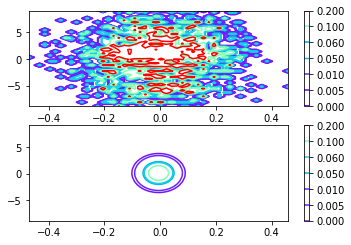

In [10]:
fig = plt.figure()
ax = fig.add_subplot(211)
#q_samples = np.random.normal(0,1,2000)
#p_samples = np.random.normal(0,1,2000)
H, xedges, yedges = np.histogram2d(q_samples, p_samples, bins=(50, 50),density=True)
print(xedges)
extent = [xedges[0], xedges[-1],yedges[0], yedges[-1]]
plt.subplots_adjust(bottom=0.15, left=0.15)
print(np.max(H))
levels = np.array([0,0.005,0.01,0.05,0.06,0.1,0.2])
#levels = np.concatenate((np.linspace(0,0.001,10),np.linspace(0.06,1.2,200)), axis=0)

cset = plt.contour(H,levels,linewidths=(1.9, 1.6, 1.5, 1.4),extent=extent,cmap=plt.cm.rainbow)
plt.colorbar()

x = np.linspace(-9,9 ,100)
y = np.linspace(-9,9, 100)
X, Y = np.meshgrid(x,y)
Z = analytic_rho_w_aho(Lambda,hbar,omega,beta,m,X,Y)
print(Z.max())
fig.add_subplot(212)
cset2=plt.contour(Z, levels, cmap=plt.cm.rainbow,extent=extent);
plt.colorbar()
#plt.clabel(cset, inline=1, fontsize=10, fmt='%1.0i')
#for c in cset.collections:
#    c.set_linestyle('solid')

In [17]:
import numpy as np
q_analytic = np.random.normal(0,1,10)

q_analytic


array([-0.48987607, -2.40585829,  0.3950652 ,  0.01605964, -0.05215085,
       -1.01784542, -1.56197658, -0.0132771 ,  1.11007625, -0.93782782])